In [1]:
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai import *
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2 as cv
import os

In [3]:
np.random.seed(42)
path=Path('/home/mobiliser/Python Scripts/DL/male female  db')
data = ImageDataBunch.from_folder(path/'Data', train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

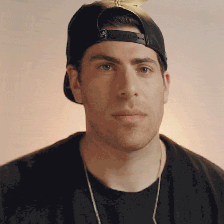

In [4]:
data.train_ds[6][0]

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
#learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.650810,0.403048,0.160305,00:17
1,0.439720,0.401137,0.137405,00:14
2,0.341050,0.369843,0.099237,00:14
3,0.272180,0.361301,0.106870,00:13


In [48]:
a,b=learn.get_preds(data.valid_ds.x).get_accuracy()
b,lean(b)

AttributeError: 'list' object has no attribute 'get_accuracy'

In [18]:
data.classes

['female', 'male']

In [34]:
b=data.valid_ds.y


KeyError: Category male

In [40]:
dd['Category male']

1

In [41]:
type(list(b)[1])

fastai.core.Category

In [42]:
data.

AttributeError: category

In [7]:
#learn.save(path/'models/l1')

In [8]:
learn.load(path/'models/l1')

Learner(data=ImageDataBunch;

Train: LabelList (524 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,male,male,male,male
Path: /home/mobiliser/Python Scripts/DL/male female  db/Data;

Valid: LabelList (131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,male,female,male,female
Path: /home/mobiliser/Python Scripts/DL/male female  db/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [9]:
interp=ClassificationInterpretation.from_learner(learn)

In [10]:
interp.most_confused()

[('male', 'female', 7), ('female', 'male', 6)]

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.top_losses()

In [13]:
loss,idxs=interp.top_losses()

In [21]:
top_loss_path=data.valid_ds.x[idxs]

In [ ]:
fd=FileDeleter(fil)

In [23]:
from fastai.widgets import *

In [ ]:
ImageCleaner(data.valid_ds,path=top_loss_path).from

In [24]:
ds, idxs = DatasetFormatter().from_toplosses(learn)


In [25]:
path

PosixPath('/home/mobiliser/Python Scripts/DL/male female  db')

In [28]:
ImageCleaner(ds, idxs, path/'Data/')

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Application

In [1]:
from fastai.vision import *
from fastai import *
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2 as cv
import os
from IPython.display import clear_output

In [2]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)
np.random.seed(42)
path=Path('/home/mobiliser/Python Scripts/DL/male female  db')
data2 = ImageDataBunch.single_from_classes(path/'models', classes=['Female', 'Male'],ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34, metrics=error_rate)
learn.load(path/'models/l1')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/mobiliser/Python Scripts/DL/male female  db/models;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/mobiliser/Python Scripts/DL/male female  db/models;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps

In [3]:
def square(arr):
    s=min(arr.shape[0],arr.shape[1])
    h,w=arr.shape[0],arr.shape[1]
    arr=arr[int((h-s)/2):int((h-s)/2+s),int((w-s)/2):int((w-s)/2+s)]
    return arr

In [4]:
def show(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    return img

In [5]:
def prediction(img):
    plt.imsave(path/'temp/img.png',img)
    img=open_image(path/'temp/img.png')
    p=learn.predict(img)
    os.remove(path/'temp/img.png')
    
    return p

In [6]:
def capture_image(live_prediction=False):
    img=0
    cam=cv.VideoCapture(0)  
    cam.set(cv.CAP_PROP_FRAME_WIDTH,400)
    cam.set(cv.CAP_PROP_FRAME_HEIGHT,400)
    
    t=0
    while cam.isOpened():
        t=t+1
        ret,frame=cam.read()
        frame=cv.resize(square(frame),(400,400))
        frame=cv.flip(frame,1)
        
        if ret==True:
            cv.imshow('Live Cam',frame)
            if cv.waitKey(15) & 0xFF == ord('q'):
                print('\'q\' pressed.')
                break
            elif cv.waitKey(15) & 0xFF == ord('s'):
                print('\'s\' pressed.')
                img=frame   
                
        else: 
            break
        
        if live_prediction:
            if t==20:
                clear_output()
                pp=prediction(frame)
                print(str(pp[0])+f'  Surity={int(pp[-1][pp[1].item()]*10000)/100}%')
                t=0
             
            
#     '''
#     ord('q') returns the Unicode code point of q
#     cv2.waitkey(1) returns a 32-bit integer corresponding to the pressed key
#     & 0xFF is a bit mask which sets the left 24 bits to zero, because ord() returns a value betwen 0 and 255, since your keyboard only has a limited character set
#     Therefore, once the mask is applied, it is then possible to check if it is the corresponding key.
#     '''q

    cam.release()
    cv.destroyAllWindows()
    print('Camera closed.')
    if type(img)==type(0):
        return
    img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    return img

In [7]:
capture_image(live_prediction=True)

Male  Surity=92.59%
'q' pressed.
Camera closed.
